In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import math
import cv2 as cv

In [4]:
test_load = nib.load('../dataset/Task07_Pancreas/imagesTr/pancreas_001.nii.gz').get_fdata()
test_load_label = nib.load('../dataset/Task07_Pancreas/labelsTr/pancreas_001.nii.gz').get_fdata()
test_load.shape
slices=test_load.shape[2]

In [5]:
def find_slice(slices,category):
    best = 0
    slice_no = 0
    for x in range(slices):
        mat = np.matrix(test_load_label[:, :, x])
        current = np.count_nonzero(mat == category)

        if current > best:
           
            best = current
            slice_no = x
    return slice_no

In [6]:
pancreas_best = find_slice(slices,1)
tumor_best = find_slice(slices,2)

print(pancreas_best)
print(tumor_best)

55
41


In [7]:
new_label = np.maximum(test_load_label[:, :, pancreas_best],test_load_label[:, :, tumor_best])
new_label.shape

(512, 512)

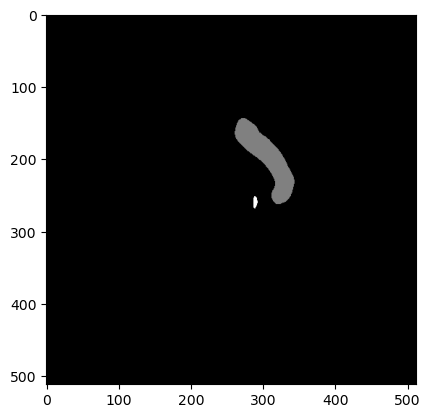

In [8]:
imgplot=plt.imshow(test_load_label[:, :, pancreas_best], cmap="gray")  
plt.show()


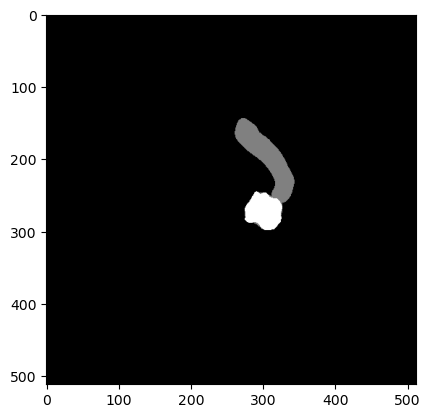

In [9]:
imgplot=plt.imshow(new_label, cmap="gray")  
plt.show()


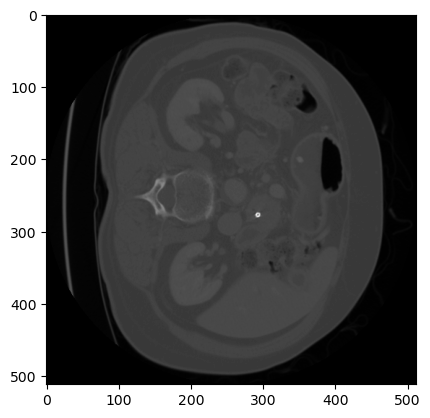

In [10]:
imgplot=plt.imshow(test_load[:,:,tumor_best], cmap="gray")  
plt.show()

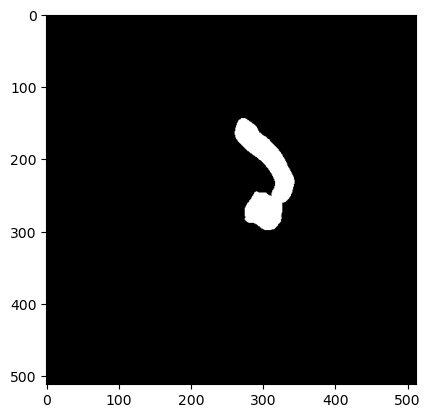

In [11]:
threshold=0.
ret,binary_mask=cv.threshold(new_label,threshold,2.,cv.THRESH_BINARY)
# print(binary_mask.shape)
binary_mask[binary_mask != 0] = 1.

plt.imshow(binary_mask,cmap="gray")
plt.show()

In [44]:
result = binary_mask*test_load[:,:,tumor_best]
result[result == 0] = -1024.

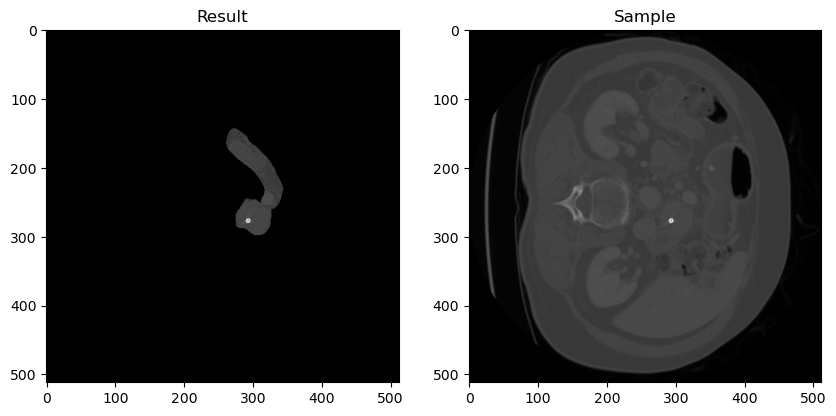

In [46]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(result, cmap="gray")
plt.title("Result")

plt.subplot(1,2,2)
plt.imshow(test_load[:,:,tumor_best],cmap="gray")
plt.title("Sample")

plt.show()


In [22]:
non_zero_rows = result[~(result== -1024.).all(axis=1)]

# Print the rows with non-zero elements
for row in non_zero_rows:
    print(row)

[-1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024. -1024.
 -1024

In [41]:
#Texture Analysis
from skimage import segmentation

In [39]:

regions = segmentation.slic(result, n_segments=150)
std_images = []
for region in regions:
    std_image = np.std(result[region], axis=(0, 1))
    std_images.append(std_image)



In [40]:
std_images

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0